# How LLMs Work
This notebook will provide an overview of how language models (LLMs) work. We'll cover the key components and processes involved in generating text, including encoding, decoding, and attention mechanisms.

Innanzitutto partiamo dalle reti neurali classiche, usate principalmente per classificazione e regressione.

![classificazione](https://raw.githubusercontent.com/maeste/iis_ai/refs/heads/main/images/1.png)
[image credit: https://www.youtube.com/watch?v=RDMwSAZwn8I]

![regressione](https://raw.githubusercontent.com/maeste/iis_ai/refs/heads/main/images/2.png)


Ma ora vediamo cosa è di fatto la regressione con un semplice esempio a 2 dimensioni

# New Section

In [1]:
!pip uninstall -y numpy matplotlib
!pip install numpy
!pip install matplotlib --force-reinstall
!pip install  ipywidgets scikit-learn


Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: matplotlib 3.10.0
Uninstalling matplotlib-3.10.0:
  Successfully uninstalled matplotlib-3.10.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 47.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.38.0 requires matplotlib>=3.7.1, which is not installed.
music21 9.3.0 requires matplotlib, which is not installed.
wordcloud 1.9.4 requires matplotlib, which is not installed.
seaborn 0.13.2 requires matplotlib!=3.6.1,>=3.4, which is not installed.
arviz 0.20.0 requires matplotlib>=3.5, which is not installed.
mlxtend 0.23.4 requires matplotlib>=3.0.0, which is not installed.
matplotlib-venn 1.1.2 requires matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 53.0 MB/s eta 0:00:00


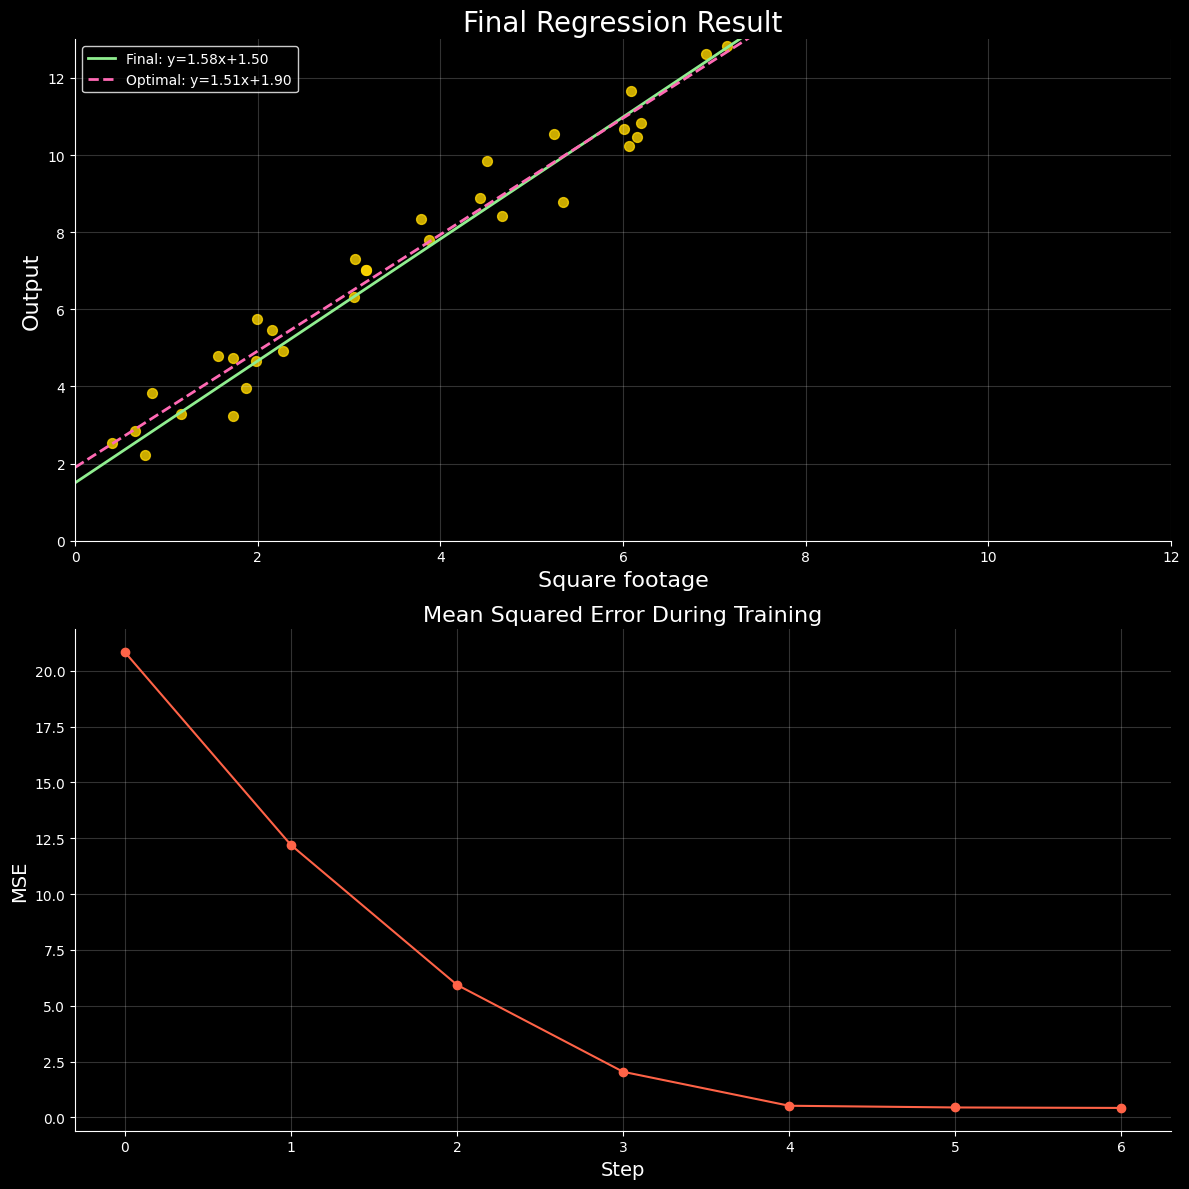

Training complete in 10 steps
Final parameters: y = 1.58x + 1.50
Final MSE: 0.4256
Final R-squared: 0.9776
Optimal parameters: y = 1.51x + 1.90
Optimal MSE: 0.3792


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
import time
from matplotlib.animation import FuncAnimation

# Set random seed for reproducibility
np.random.seed(42)

# Generate data points once (and keep them fixed)
num_points = 40
x_data = np.random.uniform(0.2, 10, num_points)
# Generate y values with some default slope, intercept and noise
true_slope = 1.5
true_intercept = 2.0
noise = 0.7
y_data = true_slope * x_data + true_intercept + np.random.normal(0, noise, num_points)

# Calculate the optimal parameters using numpy's polyfit
optimal_slope, optimal_intercept = np.polyfit(x_data, y_data, 1)

# Calculate Mean Squared Error
def calculate_mse(slope, intercept):
    predicted_y = slope * x_data + intercept
    residuals = y_data - predicted_y
    mse = np.mean(residuals**2)
    return mse

# Calculate R-squared
def calculate_r_squared(slope, intercept):
    predicted_y = slope * x_data + intercept
    residuals = y_data - predicted_y
    ss_total = np.sum((y_data - np.mean(y_data))**2)
    ss_residual = np.sum(residuals**2)
    r_squared = 1 - (ss_residual / ss_total)
    return r_squared

# Create interactive widgets
slope_slider = widgets.FloatSlider(
    value=0.5,
    min=0.1,
    max=3.0,
    step=0.1,
    description='Slope:',
    continuous_update=False
)

intercept_slider = widgets.FloatSlider(
    value=1.0,
    min=-2.0,
    max=5.0,
    step=0.1,
    description='Intercept:',
    continuous_update=False
)

# Function to update plot when sliders change
def update_plot(slope, intercept):
    clear_output(wait=True)

    # Create figure with black background
    plt.figure(figsize=(12, 8), facecolor='black')
    ax = plt.subplot(111)
    ax.set_facecolor('black')

    # Plot the fixed data points
    ax.scatter(x_data, y_data, color='#FFD700', s=50, alpha=0.8)

    # Create x values for the line
    line_x = np.array([0, 12])
    line_y = slope * line_x + intercept

    # Plot the line
    ax.plot(line_x, line_y, color='#90EE90', linewidth=2)

    # Calculate R-squared and MSE
    r_squared = calculate_r_squared(slope, intercept)
    mse = calculate_mse(slope, intercept)

    # Set axis colors to white
    ax.spines['bottom'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Set tick colors to white
    ax.tick_params(axis='x', colors='white', which='both')
    ax.tick_params(axis='y', colors='white', which='both')

    # Set axis labels with larger font
    ax.set_xlabel('Square footage', color='white', fontsize=20)
    ax.set_ylabel('Output', color='white', fontsize=20)

    # Set title with current parameters and R-squared
    ax.set_title(f'Linear Regression (y = {slope:.2f}x + {intercept:.2f}, R² = {r_squared:.3f})',
                 color='white', fontsize=20)

    # Set axis limits
    ax.set_xlim(0, 12)
    ax.set_ylim(0, 13)

    # Show gridlines
    ax.grid(True, alpha=0.2, color='white')

    plt.tight_layout()
    plt.show()

    print(f"Line equation: y = {slope:.2f}x + {intercept:.2f}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R-squared: {r_squared:.4f}")
    print(f"Optimal parameters: y = {optimal_slope:.2f}x + {optimal_intercept:.2f}")

# Manual training function with simpler approach
def train_model_step_by_step(button):
    button.disabled = True
    slope_slider.disabled = True
    intercept_slider.disabled = True

    # Initialize parameters
    current_slope = 1.0
    current_intercept = 0.0

    # Initial step sizes
    slope_step = 0.15
    intercept_step = 0.3

    # Direction multipliers (1 = positive direction, -1 = negative direction)
    slope_direction = 1 if slope_step > 0 else -1
    intercept_direction = 1 if intercept_step > 0 else -1

    # Make sure we have non-zero step sizes
    slope_step = max(abs(slope_step), 0.05)
    intercept_step = max(abs(intercept_step), 0.05)

    # Calculate initial MSE
    current_mse = calculate_mse(current_slope, current_intercept)

    # History for plotting
    history = [(current_slope, current_intercept, current_mse)]

    # Define colors
    color_current = '#FFFFFF'  # White
    color_slope_only = '#FF6347'  # Tomato
    color_intercept_only = '#4169E1'  # Royal Blue
    color_both = '#32CD32'  # Lime Green
    color_optimal = '#FF69B4'  # Hot Pink

    # Maximum number of steps
    max_steps = 10
    step = 0

    while step < max_steps:
        # Clear previous output
        clear_output(wait=True)

        # Create a new figure
        fig, ax = plt.subplots(figsize=(12, 8), facecolor='black')
        ax.set_facecolor('black')

        # Plot the data points
        ax.scatter(x_data, y_data, color='#FFD700', s=50, alpha=0.8)

        # Set up common plot elements
        ax.set_xlabel('Square footage', color='white', fontsize=20)
        ax.set_ylabel('Output', color='white', fontsize=20)
        ax.set_xlim(0, 12)
        ax.set_ylim(0, 13)
        ax.grid(True, alpha=0.2, color='white')
        ax.set_title(f'Step {step+1}: Linear Regression Training', color='white', fontsize=20)

        # Set axis colors
        ax.spines['bottom'].set_color('white')
        ax.spines['left'].set_color('white')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.tick_params(axis='x', colors='white', which='both')
        ax.tick_params(axis='y', colors='white', which='both')

        # Plot current line
        line_x = np.array([0, 12])
        current_y = current_slope * line_x + current_intercept
        ax.plot(line_x, current_y, color=color_current, linewidth=2, label=f'Current: y={current_slope:.2f}x+{current_intercept:.2f}')

        # Display the current state
        plt.legend(loc='upper left', facecolor='black', edgecolor='white', labelcolor='white')
        plt.tight_layout()
        plt.show()

        print(f"Step {step+1}")
        print(f"Current line: y = {current_slope:.2f}x + {current_intercept:.2f}")
        print(f"Current MSE: {current_mse:.4f}")
        time.sleep(2)

        # Calculate parameters for trials
        new_slope = current_slope + slope_step * slope_direction
        new_intercept = current_intercept + intercept_step * intercept_direction

        # Keep parameters within slider ranges
        new_slope = min(max(new_slope, slope_slider.min), slope_slider.max)
        new_intercept = min(max(new_intercept, intercept_slider.min), intercept_slider.max)

        # Trial 1: Change slope only
        trial1_slope = new_slope
        trial1_intercept = current_intercept
        trial1_mse = calculate_mse(trial1_slope, trial1_intercept)

        # Trial 2: Change intercept only
        trial2_slope = current_slope
        trial2_intercept = new_intercept
        trial2_mse = calculate_mse(trial2_slope, trial2_intercept)

        # Trial 3: Change both
        trial3_slope = new_slope
        trial3_intercept = new_intercept
        trial3_mse = calculate_mse(trial3_slope, trial3_intercept)

        # Update plot with trial lines
        clear_output(wait=True)
        fig, ax = plt.subplots(figsize=(12, 8), facecolor='black')
        ax.set_facecolor('black')

        # Plot the data points
        ax.scatter(x_data, y_data, color='#FFD700', s=50, alpha=0.8)

        # Set up common plot elements
        ax.set_xlabel('Square footage', color='white', fontsize=20)
        ax.set_ylabel('Output', color='white', fontsize=20)
        ax.set_xlim(0, 12)
        ax.set_ylim(0, 13)
        ax.grid(True, alpha=0.2, color='white')
        ax.set_title(f'Step {step+1}: Comparing Trial Lines', color='white', fontsize=20)

        # Set axis colors
        ax.spines['bottom'].set_color('white')
        ax.spines['left'].set_color('white')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.tick_params(axis='x', colors='white', which='both')
        ax.tick_params(axis='y', colors='white', which='both')

        # Plot current and trial lines
        current_y = current_slope * line_x + current_intercept
        trial1_y = trial1_slope * line_x + trial1_intercept
        trial2_y = trial2_slope * line_x + trial2_intercept
        trial3_y = trial3_slope * line_x + trial3_intercept

        ax.plot(line_x, current_y, color=color_current, linewidth=2, label=f'Current: y={current_slope:.2f}x+{current_intercept:.2f}')
        ax.plot(line_x, trial1_y, color=color_slope_only, linewidth=2, label=f'Slope Only: y={trial1_slope:.2f}x+{trial1_intercept:.2f}')
        ax.plot(line_x, trial2_y, color=color_intercept_only, linewidth=2, label=f'Intercept Only: y={trial2_slope:.2f}x+{trial2_intercept:.2f}')
        ax.plot(line_x, trial3_y, color=color_both, linewidth=2, label=f'Both: y={trial3_slope:.2f}x+{trial3_intercept:.2f}')

        # Display the trial plot
        plt.legend(loc='upper left', facecolor='black', edgecolor='white', labelcolor='white')
        plt.tight_layout()
        plt.show()

        print(f"Step {step+1} Trials:")
        print(f"Trial 1 - Change Slope Only: y = {trial1_slope:.2f}x + {trial1_intercept:.2f}, MSE = {trial1_mse:.4f}")
        print(f"Trial 2 - Change Intercept Only: y = {trial2_slope:.2f}x + {trial2_intercept:.2f}, MSE = {trial2_mse:.4f}")
        print(f"Trial 3 - Change Both: y = {trial3_slope:.2f}x + {trial3_intercept:.2f}, MSE = {trial3_mse:.4f}")
        time.sleep(1)

        # Determine the best trial
        trial_mses = [trial1_mse, trial2_mse, trial3_mse]
        best_trial_idx = np.argmin(trial_mses)

        # Update plot highlighting the best trial
        clear_output(wait=True)
        fig, ax = plt.subplots(figsize=(12, 8), facecolor='black')
        ax.set_facecolor('black')

        # Plot the data points
        ax.scatter(x_data, y_data, color='#FFD700', s=50, alpha=0.8)

        # Set up common plot elements
        ax.set_xlabel('Square footage', color='white', fontsize=20)
        ax.set_ylabel('Output', color='white', fontsize=20)
        ax.set_xlim(0, 12)
        ax.set_ylim(0, 13)
        ax.grid(True, alpha=0.2, color='white')
        ax.set_title(f'Step {step+1}: Selected Best Line', color='white', fontsize=20)

        # Set axis colors
        ax.spines['bottom'].set_color('white')
        ax.spines['left'].set_color('white')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.tick_params(axis='x', colors='white', which='both')
        ax.tick_params(axis='y', colors='white', which='both')

        # Plot current line with low alpha
        ax.plot(line_x, current_y, color=color_current, linewidth=1, alpha=0.5, label='Current')

        # Select the best trial
        if best_trial_idx == 0:  # Trial 1: Slope only
            next_slope = trial1_slope
            next_intercept = trial1_intercept
            best_mse = trial1_mse
            ax.plot(line_x, trial1_y, color=color_slope_only, linewidth=3, label='Selected: Slope Only')
            selected_label = "Slope Only"
        elif best_trial_idx == 1:  # Trial 2: Intercept only
            next_slope = trial2_slope
            next_intercept = trial2_intercept
            best_mse = trial2_mse
            ax.plot(line_x, trial2_y, color=color_intercept_only, linewidth=3, label='Selected: Intercept Only')
            selected_label = "Intercept Only"
        else:  # Trial 3: Both
            next_slope = trial3_slope
            next_intercept = trial3_intercept
            best_mse = trial3_mse
            ax.plot(line_x, trial3_y, color=color_both, linewidth=3, label='Selected: Both')
            selected_label = "Both"

        # Display the selection plot
        plt.legend(loc='upper left', facecolor='black', edgecolor='white', labelcolor='white')
        plt.tight_layout()
        plt.show()

        print(f"Selected: {selected_label}")
        print(f"New line: y = {next_slope:.2f}x + {next_intercept:.2f}")
        print(f"New MSE: {best_mse:.4f}")
        time.sleep(2)

        # Check if we made the fit worse
        if best_mse > current_mse:
            clear_output(wait=True)
            print(f"All trials made the fit worse! Halving step sizes and reversing directions.")

            # Reverse directions
            slope_direction *= -1
            intercept_direction *= -1

            # Halve step sizes
            slope_step /= 2
            intercept_step /= 2

            # If step sizes are too small, we've converged
            if slope_step < 0.01 and intercept_step < 0.01:
                print("Converged! Step sizes are very small.")
                break

            time.sleep(1)
        else:
            # Update for next iteration
            current_slope = next_slope
            current_intercept = next_intercept
            current_mse = best_mse

            # Update sliders
            slope_slider.value = current_slope
            intercept_slider.value = current_intercept

            # Add to history
            history.append((current_slope, current_intercept, current_mse))

            # Check if we're very close to optimal
            mse_optimal = calculate_mse(optimal_slope, optimal_intercept)
            if abs(current_mse - mse_optimal) < 0.01:
                clear_output(wait=True)
                print("Converged! Very close to optimal solution.")
                time.sleep(1)
                break

        step += 1

    # Show final result
    clear_output(wait=True)
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), facecolor='black')

    # Top plot: Final regression result
    ax1.set_facecolor('black')
    ax1.scatter(x_data, y_data, color='#FFD700', s=50, alpha=0.8)

    # Final line
    final_y = current_slope * line_x + current_intercept
    ax1.plot(line_x, final_y, color='#90EE90', linewidth=2, label=f'Final: y={current_slope:.2f}x+{current_intercept:.2f}')

    # Optimal line
    optimal_y = optimal_slope * line_x + optimal_intercept
    ax1.plot(line_x, optimal_y, color='#FF69B4', linewidth=2, linestyle='--',
             label=f'Optimal: y={optimal_slope:.2f}x+{optimal_intercept:.2f}')

    # Set up top plot
    ax1.set_title('Final Regression Result', color='white', fontsize=20)
    ax1.set_xlabel('Square footage', color='white', fontsize=16)
    ax1.set_ylabel('Output', color='white', fontsize=16)
    ax1.set_xlim(0, 12)
    ax1.set_ylim(0, 13)
    ax1.grid(True, alpha=0.2, color='white')
    ax1.spines['bottom'].set_color('white')
    ax1.spines['left'].set_color('white')
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.tick_params(axis='x', colors='white')
    ax1.tick_params(axis='y', colors='white')
    ax1.legend(loc='upper left', facecolor='black', edgecolor='white', labelcolor='white')

    # Bottom plot: MSE history
    ax2.set_facecolor('black')
    mse_history = [h[2] for h in history]
    ax2.plot(range(len(mse_history)), mse_history, 'o-', color='#FF6347')

    # Set up bottom plot
    ax2.set_title('Mean Squared Error During Training', color='white', fontsize=16)
    ax2.set_xlabel('Step', color='white', fontsize=14)
    ax2.set_ylabel('MSE', color='white', fontsize=14)
    ax2.spines['bottom'].set_color('white')
    ax2.spines['left'].set_color('white')
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.tick_params(axis='x', colors='white')
    ax2.tick_params(axis='y', colors='white')
    ax2.grid(True, alpha=0.2, color='white')

    plt.tight_layout()
    plt.show()

    print(f"Training complete in {step} steps")
    print(f"Final parameters: y = {current_slope:.2f}x + {current_intercept:.2f}")
    print(f"Final MSE: {current_mse:.4f}")
    print(f"Final R-squared: {calculate_r_squared(current_slope, current_intercept):.4f}")
    print(f"Optimal parameters: y = {optimal_slope:.2f}x + {optimal_intercept:.2f}")
    print(f"Optimal MSE: {calculate_mse(optimal_slope, optimal_intercept):.4f}")

    # Re-enable controls after animation completes
    button.disabled = False
    slope_slider.disabled = False
    intercept_slider.disabled = False

# Create train button
train_button = widgets.Button(
    description='Train Model',
    button_style='success',
    tooltip='Step-by-step training to find optimal parameters'
)

# Connect button to function
train_button.on_click(train_model_step_by_step)

# Initialize the plot
update_plot(1.0, 0.0)

# Display the widgets and plot
controls = widgets.VBox([slope_slider, intercept_slider, train_button])
display(controls)

# Dal Neurone artificiale all'autoencoder

![Neurone artificiale](https://raw.githubusercontent.com/maeste/iis_ai/refs/heads/main/images/3.png)


![Deep Learning](https://raw.githubusercontent.com/maeste/iis_ai/refs/heads/main/images/4.png)

![Autoencoder](https://raw.githubusercontent.com/maeste/iis_ai/refs/heads/main/images/5.png)

![Self Encoder](https://raw.githubusercontent.com/maeste/iis_ai/refs/heads/main/images/6.png)

# Ora proviamo a giocare un po' con le reti neurali e vedere dove e come conservano l'informazione

Prima una cosa semplice....

[Analyzing our neural network di 3Blue1Brown](https://www.3blue1brown.com/lessons/neural-network-analysis)

----

Poi vediamo una rete neurale moderna di classificazione

[attention visualization](https://huggingface.co/spaces/webml-community/attention-visualization)

# Da qui agli LLM è solo questione di attenzione

![Attention is all you need](https://raw.githubusercontent.com/maeste/iis_ai/refs/heads/main/images/7.png)

E su questo iniziamo a vedere un video insieme

[3Blue1Brown LLM for beginners](https://youtu.be/LPZh9BOjkQs)

# Con quali dati si fa un training

[datasets](https://huggingface.co/datasets)





# Ma come fa un LLM a decidere qual'è la prossima parola?

![Transformer](https://raw.githubusercontent.com/maeste/iis_ai/refs/heads/main/images/8.png)


Come abbiamo visto il lavoro è fatto su i token...ma cosa sono questi token?

* Una parola?
* Un insieme di parole?
* una parte di una parola?

[Proviamo...](https://platform.openai.com/tokenizer)

I token (ed il loro significato in uncerto senso) sono rappresentati come vettori multidimensionali (tensori). Questa rappresentazione è detto embedding

![embeddings](https://raw.githubusercontent.com/maeste/iis_ai/refs/heads/main/images/9.png)

La rappresentazione vettoriale permette di fare calcoli

![vector aritmetics](https://raw.githubusercontent.com/maeste/iis_ai/refs/heads/main/images/10.png)

![vector aritmetics](https://raw.githubusercontent.com/maeste/iis_ai/refs/heads/main/images/11.png)

![Vector aritmetics](https://raw.githubusercontent.com/maeste/iis_ai/refs/heads/main/images/12.png)

![Direction](https://raw.githubusercontent.com/maeste/iis_ai/refs/heads/main/images/13.png)

------

## Quindi E(gatto) - E(miao) + E(Bau) = ?

------


Viene poi definita una unemdding matrix che permette di passare ad un array unidimensionale....ma che ancora non è una distribuzione di probabilità


![Unembedding](https://raw.githubusercontent.com/maeste/iis_ai/refs/heads/main/images/14.png)

Quindi si applica una funzione di softmax

![softmax](https://raw.githubusercontent.com/maeste/iis_ai/refs/heads/main/images/15.png)

Ma come dicevamo del cervello umano serve imprevidibilità...se volete chiamatela creatività e alloro si introducono alcune variabli T, top-k, top-p...vediamone solo uno matematicamente

![Attention is all you need](https://raw.githubusercontent.com/maeste/iis_ai/refs/heads/main/images/16.png)


[a per capire meglio giochiamo con tutte e tre](https://huggingface.co/spaces/genaibook/token_probability_distribution)



##Capire come funzionano questo cose ci fa capire come interagire con gli LLM, ovvero come scrivere prompt migliori





# Ma cosa possono fare questi LLM

Un sacco di cose:

[Leggere un grafico](https://huggingface.co/spaces/ahmed-masry/ChartGemma)

[Creare una immagine](https://huggingface.co/spaces/multimodalart/stable-diffusion-3.5-large-turboX)

[Creare o clonare una voce](https://huggingface.co/spaces/Mobvoi/Offical-Spark-TTS)

Fare applicazioni molto evolute.....così evolute da sembrare super poteri (demo di qualche Big LLM)

Proviamo ad esplorare un po' huggingface [sapces](https://huggingface.co/spaces) and [spaces of the week](https://huggingface.co/spaces/hysts/spaces-of-the-week)